Author: Carlos Roberto de Melo

Obj: MGE parametrization for NFW profile.

The classical spherical NFW profile is:
<center> $\rho(r) = \frac{\rho_s}{(r/r_s)  (1 + r/r_s)^2 }$.
    
    
But in terms of the critical surface density,
<center> $\Sigma_{crit} = \frac{c^2}{4\pi G} \frac{D_s}{D_l D_{ls}}$    
    
we have:
<center> $\rho(r) = \frac{\kappa_s \Sigma_{crit}}{r(1 + r/r_s)^2 }$,

where: $\kappa_s = \frac{\rho_s r_s}{\Sigma_{crit}}$.
    
To obtain the elliptical mass profile, we had to replace the radial coordinate $r = \sqrt{x^2 + y^2}$, by a elliptical one $r_e = \sqrt{x^2 + y^2/q^2}$, where $q$ is the axial ratio assuming that the semi major  axis of the ellipse is in the x-axis.
    
The MGE parameterization is particularly useful in this case, because we can parametrize the Spherical profile, and then just adjuste the projected axial ratio in the final output. But in case of you don't trust me (even if you trust, I strongly recommend a quick look) , you can check the comparison in the _MGE with Analytical Profiles_ folder.
 
Beside that, we set here $\kappa_s = 1.00$, so if you want to re-scale the NFW total mass you only have to re-scale this parameter (assuming that you don't want to change the scale radius).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mgefit import mge_fit_1d                                       #MGE 1-d parametrization
from jampy.mge_half_light_isophote import mge_half_light_isophote   #Compute half light radius
from jampy.mge_half_light_isophote import mge_half_light_radius     #Compute half light radius (other way)
from jampy import mge_radial_mass                                   #Compute mass inside some radius

from astropy.cosmology import Planck15 as cosmo
from astropy import units as u
from astropy import table
from astropy import constants
import math

from astropy.cosmology import Planck15
from astropy.constants import G, M_sun, c
import astropy.units as u
from scipy.integrate import quad

In [2]:
def Sph_NFW_lens(kappa_s, r_s, den_crit, r):
    """
        Classical Spherical NFW profile, usually used in lensing models. Here, the profile is writed in terms of
        kappa_s, which is a constant scale factor defined above in this notebook.
    """
    return (kappa_s * den_crit) / (r * (1 + r/r_s)**2 )


In [3]:
G_Mpc = constants.G.to("Mpc3 / (solMass * s2)")
c_Mpc = constants.c.to("Mpc / s")

In [4]:
#Constante factor in lens critical density
const = constants.c.to("Mpc / s") ** 2.0 / (
        4 * math.pi * constants.G.to("Mpc3 / (" + "solMass" + " s2)"))
const

<Quantity 1.66291654e+18 solMass / Mpc>

In [5]:
#Redshift
z_l = 0.299     #Lens Galaxy
z_s = 3.042     #Source galaxy

#Angular diametre distances
D_l  = Planck15.angular_diameter_distance(z_l)
D_s  = Planck15.angular_diameter_distance(z_s)
D_ls = Planck15.angular_diameter_distance_z1z2(z_l, z_s)

#NFW parameters
const            = (c_Mpc**2/(4*np.pi*G_Mpc))
critical_density = (const * (D_s/(D_ls * D_l))).to(u.solMass/u.pc**2)           #Lens Critical Density
print("Critical Density:", critical_density)
kappa_s = 1.000                                                                #Lens scale factor [Ad]
r_s     = ( (10 * 1.15 * u.arcsec) * D_l ).to(u.pc, u.dimensionless_angles())  #Scale radius      [pc]

r = np.logspace(-2.5, 8.5, 300) #Radii [pc]
print("Min: %.3e arcs, Max: %.3e arcs" %( r.min()/(D_l.value*np.pi/0.648), r.max()/(D_l.value*np.pi/0.648) ))

Critical Density: 2164.8451473174887 solMass / pc2
Min: 6.900e-07 arcs, Max: 6.900e+04 arcs


In [6]:
from autogalaxy.util import cosmology_util
autolens_critical_density = cosmology_util.critical_surface_density_between_redshifts_from(redshift_0=z_l, redshift_1=z_s,
                                                                   cosmology=cosmo, 
                                                                   unit_mass="solMass", 
                                                                   unit_length="kpc")
print("Autolens Critical Density: %.4e [M_sun/kpc2]"%autolens_critical_density)
print("Autolens Critical Density: %.4e [M_sun/pc2]"%(autolens_critical_density/(1e3)**2))
print("My calculation of Critical Density: %.4e "%(critical_density.value), critical_density.unit)


Autolens Critical Density: 2.1648e+09 [M_sun/kpc2]
Autolens Critical Density: 2.1648e+03 [M_sun/pc2]
My calculation of Critical Density: 2.1648e+03  solMass / pc2


In [7]:
r_s, critical_density

(<Quantity 52708.16795954 pc>, <Quantity 2164.84514732 solMass / pc2>)

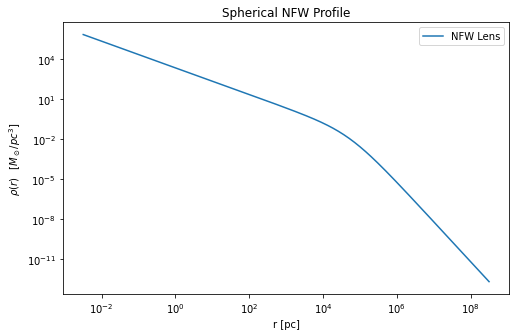

In [8]:
NFW_profile_lens = Sph_NFW_lens(kappa_s, r_s.value, critical_density.value, r)

plt.figure(figsize=(8,5))
plt.loglog(r, NFW_profile_lens, label="NFW Lens")

plt.title("Spherical NFW Profile")
plt.xlabel("r [pc]")
plt.ylabel("$\\rho(r)$ $\\,$ [$M_\\odot$/$pc^3$]")
plt.legend()

## MGE parametrization

Iteration: 1  chi2: 0.07383 Nonzero: 35/35
Iteration: 11  chi2: 0.01635 Nonzero: 35/35
Iteration: 21  chi2: 0.01202 Nonzero: 35/35
Iteration: 31  chi2: 0.01023 Nonzero: 35/35
Iteration: 41  chi2: 0.0095 Nonzero: 35/35
Iteration: 51  chi2: 0.009292 Nonzero: 35/35
Iteration: 59  chi2: 0.00929 Nonzero: 35/35
############################################
 Computation time: 3.21 seconds
 Total Iterations:  59
Nonzero Gaussians:  35
 Unused Gaussians:  0
 Chi2: 0.00929 
 STDEV: 0.005565
 MEANABSDEV: 0.004968
############################################
 Total_Counts      Sigma
############################################
      3676.96   0.00234148
      3609.77   0.00541688
      3589.96    0.0124392
      3574.64     0.028451
      3562.59    0.0648686
      3553.59     0.147542
       3547.5     0.334998
      3544.22     0.759799
      3543.62      1.72251
      3545.52      3.90564
       3549.7      8.86195
      3555.73      20.1319
      3562.86      45.8045
      3569.54      104.387


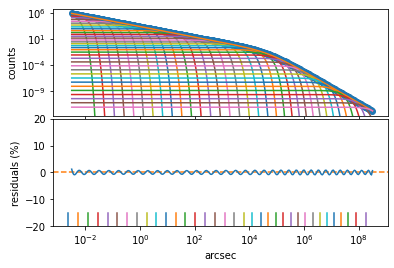

In [9]:
m = mge_fit_1d.mge_fit_1d(r, NFW_profile_lens, ngauss=35, outer_slope=2, plot=True)

In [10]:
#Converting quantities
surf  =  m.sol[0]                           # Surface density in Msun/pc**2
sigma = m.sol[1]/(D_l.value*np.pi/0.648)    # Gaussian dispersion in arcsec
qObs  = np.full_like(surf, 0.85)            # Assume elliptical model with q_obs = 0.85

In [11]:
#Transforming Surface Density to Total Mass
distance  = D_l                        # Distance in Mpc
surf_dm   = surf * u.solMass/u.pc**2
sigma_ARC = sigma * u.arcsec           #sigma in arcsec
sigma_PC  = (sigma_ARC * distance).to(u.pc, u.dimensionless_angles()) #Convert sigma in arcsec to sigma in pc

#Total DM mass per gaussian in M_sun
Mass = 2 * np.pi * surf_dm * (sigma_PC**2) * qObs
print(f"Total mass:{Mass.sum():0.03e}")

Total mass:5.192e+14 solMass


In [12]:
#Saving parametrization
np.savetxt('Input/eNFW.txt', np.column_stack([surf, sigma, qObs]),
                            fmt=b'%5.5e\t\t\t %5.5e\t\t %5.5e', 
                            header='Surface Potential(M_sun/pc²) Sigma Potential(arcsec)    qObs')